<a href="https://colab.research.google.com/github/mofanchang/ptt-Word-Embedding-sentiment-analysis/blob/main/ptt_title_%E8%B6%A8%E5%8B%A2%E5%88%86%E6%9E%90word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

In [6]:
from gensim.models import word2vec

In [14]:
model = word2vec.Word2Vec(training_set,size = 1)
model.save('jk.model')

In [15]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    #print text
    for word in text.split():
        #print word
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [16]:
def sent_vectorizer(sent, model):  #建立sentence vector
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for record in training_set:
    X.append(sent_vectorizer(record, model))   
 
print ("========================")
print(X) #印出每個標題的vector

<ipython-input-16-bfd84729e5c7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = model[w]
<ipython-input-16-bfd84729e5c7>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = np.add(sent_vec, model[w])


[array([-2.667854], dtype=float32), array([-2.5201933], dtype=float32), array([-2.3882098], dtype=float32), array([-2.3221085], dtype=float32), array([-2.3843534], dtype=float32), array([-2.3909364], dtype=float32), array([-2.6134284], dtype=float32), array([-2.5331511], dtype=float32), array([-2.3568888], dtype=float32), array([-2.5247142], dtype=float32), array([-2.3312504], dtype=float32), array([-2.3600981], dtype=float32), array([-2.4212747], dtype=float32), array([-2.3528864], dtype=float32), array([-2.5848265], dtype=float32), array([-2.3259692], dtype=float32), array([-2.3960035], dtype=float32), array([-2.3581984], dtype=float32), array([-2.3500721], dtype=float32), array([-2.4211626], dtype=float32), array([-2.3442872], dtype=float32), array([-2.4499762], dtype=float32), array([-2.5552685], dtype=float32), array([-2.248046], dtype=float32), array([-2.3905528], dtype=float32), array([-2.2866666], dtype=float32), array([-2.486924], dtype=float32), array([-2.4525435], dtype=floa

In [17]:
print(X)

[array([-2.667854], dtype=float32), array([-2.5201933], dtype=float32), array([-2.3882098], dtype=float32), array([-2.3221085], dtype=float32), array([-2.3843534], dtype=float32), array([-2.3909364], dtype=float32), array([-2.6134284], dtype=float32), array([-2.5331511], dtype=float32), array([-2.3568888], dtype=float32), array([-2.5247142], dtype=float32), array([-2.3312504], dtype=float32), array([-2.3600981], dtype=float32), array([-2.4212747], dtype=float32), array([-2.3528864], dtype=float32), array([-2.5848265], dtype=float32), array([-2.3259692], dtype=float32), array([-2.3960035], dtype=float32), array([-2.3581984], dtype=float32), array([-2.3500721], dtype=float32), array([-2.4211626], dtype=float32), array([-2.3442872], dtype=float32), array([-2.4499762], dtype=float32), array([-2.5552685], dtype=float32), array([-2.248046], dtype=float32), array([-2.3905528], dtype=float32), array([-2.2866666], dtype=float32), array([-2.486924], dtype=float32), array([-2.4525435], dtype=floa

In [18]:
import jieba
import re

# 載入繁體
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt')
doc_seg = []

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/Lifeequailmoney.txt', 'r', encoding='utf-8') as file:
    text = file.readline()
    text = re.sub('[^\u4e00-\u9fa5]+','',text)
    doc_seg.append(jieba.lcut(text))

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/0131-write.txt', 'w', encoding='utf-8') as file:
    for doc in doc_seg:
        file.write(' '.join(doc))

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
Loading model cost 1.221 seconds.
DEBUG:jieba:Loading model cost 1.221 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [20]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model")

In [21]:
model.most_similar(['全家'])

<ipython-input-21-9b1a1576cbfb>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['全家'])


[('PChome', 0.14696389436721802),
 ('台南', 0.13122132420539856),
 ('711', 0.12676627933979034),
 ('新聞', 0.11603961884975433),
 ('電子', 0.10434246063232422),
 ('特價', 0.09563684463500977),
 ('無印良品', 0.08755753934383392),
 ('整理', 0.08473358303308487),
 ('商城', 0.07896285504102707),
 ('免運', 0.07733015716075897)]

In [22]:
model.most_similar(['咖啡'])

<ipython-input-22-84e6bf4d2e4e>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['咖啡'])


[('禮物', 0.11937759071588516),
 ('跑鞋', 0.11633827537298203),
 ('禮券', 0.11015921831130981),
 ('美式', 0.09711360931396484),
 ('露天', 0.0899081826210022),
 ('雙11', 0.08978258818387985),
 ('東森', 0.08483158051967621),
 ('限量', 0.0836886540055275),
 ('Yahoo', 0.08350703120231628),
 ('app', 0.08273544907569885)]

In [23]:
model.most_similar(['蝦皮'])

<ipython-input-23-1cf74e840cda>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['蝦皮'])


[('711', 0.13127341866493225),
 ('10%', 0.11190274357795715),
 ('限時:', 0.10742688924074173),
 ('回饋', 0.10142046213150024),
 ('PChome', 0.0761193186044693),
 ('康是美', 0.07080568373203278),
 ('無線', 0.05612816661596298),
 ('指定', 0.04677848890423775),
 ('momo', 0.04631314426660538),
 ('家樂福', 0.04464329034090042)]

In [24]:
model.most_similar(['捐血'])

<ipython-input-24-5aff319c901d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['捐血'])


[('電子書', 0.08843424916267395),
 ('美式', 0.0861135870218277),
 ('GoShare', 0.08480487763881683),
 ('買一送一', 0.08208522200584412),
 ('禮券', 0.08186818659305573),
 ('限定', 0.08156627416610718),
 ('全聯', 0.07738561928272247),
 ('2023', 0.07460490614175797),
 ('foodomo', 0.06933392584323883),
 ('購物', 0.06466174125671387)]

In [25]:
model.most_similar(['1111'])

<ipython-input-25-9fc29e5d67a7>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['1111'])


[('雙11', 0.149257630109787),
 ('無印良品', 0.12689991295337677),
 ('新聞', 0.1186528354883194),
 ('紅包', 0.11368662118911743),
 ('蝦皮:', 0.10952110588550568),
 ('漢堡王', 0.10389812290668488),
 ('貼圖', 0.09916386008262634),
 ('簽到', 0.09596267342567444),
 ('露天', 0.09461773931980133),
 ('線上', 0.09282174706459045)]

In [28]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
model = Word2Vec(
    LineSentence(open('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt', 'r', encoding='utf8')),
    sg = 0,
    size = 100,
    window = 3,
    min_count = 1,
    workers=8
)
 
# 词向量保存
model.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector', binary=False)
 
# 模型保存
model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')

In [29]:

import gensim
 
# 1 通过模型加载词向量(recommend)
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
 
dic = model.wv.index2word
print(dic)
print(len(dic))
 
print(model.wv['限時'])
print(model.most_similar('限時', topn=1))
 
# 2 通过词向量加载
vector = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector')



['LINE', 'Line', '全家', '回饋', 'pay', '咖啡', 'momo', 'Momo', 'line', '捐血', '1111', '台北', '限定', '星巴克', 'Point', 'point', '免運', 'PChome', '點數', '美亞', '購物金', '家樂福', '支付', '整理', '會員', '導購', '電影票', '貼圖', '買一送一', '買1送1', '雙11', '711', '羅技', '好市多', '博客來', '限時', '活動', '蝦皮', '折扣', '購物', 'POINT', '康是美', '電子書', '7-11', '生活市集', '黑色購物', '無印良品', '漢堡王', '特價', '免費:', '限時:', '蝦皮:', '7-11:', '新聞', '指定', '討論', '露天', '限量', '柴油', 'OPENPOINT', '10%', '官網', '全聯', '2023', '商城', 'app', '全聯禮券', '騎乘金', '折價券', '肯德基', '熊貓', 'pro', '衛生紙', 'Yahoo', 'MOMO', '兌換', 'pchome', '線上', '優惠券', 'Pro', 'PCHOME', '好友', '滿額', '台南', '優惠碼', '飲料', 'GoShare', '無線', '加碼', '五折', '東森', '紅包', '電視', '電子', 'foodomo', '1212', 'points', '美式', '簽到', '禮物', '美國', '汽油', '跑鞋', '筆電', '禮券']
105
[-3.7799648e-03  7.9915376e-04 -4.3967669e-03  5.2194216e-04
  2.5918870e-03  3.3188062e-03  6.4816991e-06  1.4323557e-03
 -2.0004324e-04 -1.5076778e-03 -1.9082606e-03 -3.4026729e-03
 -2.7419429e-03 -3.2666025e-03 -8.3695416e-04 -4.2015617e-03
  2.9505915e-03 

<ipython-input-29-c8f61ad806c9>:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('限時', topn=1))


There are 105 words in vocab
please input how many words you want to plot:20


<ipython-input-30-b404fb17181f>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib

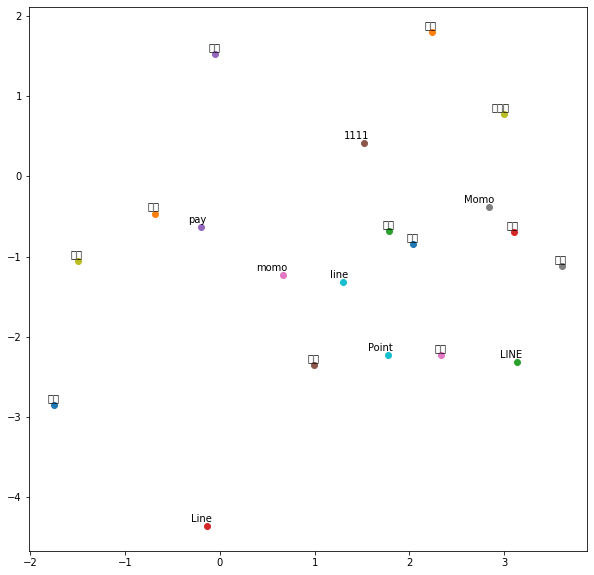

In [30]:
from builtins import bytes, range
 
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="himalaya.ttf",size=20)
 
 
def tsne_plot(model, words_num):
 
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
 
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(10, 10))
    for i in range(words_num):
        plt.scatter(x[i], y[i])
        if b'\xe0' in bytes(labels[i],encoding="utf-8"):
            this_font = font
        else:
            this_font = 'SimHei'
        plt.annotate(labels[i],
                     Fontproperties=this_font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
 
if __name__ == '__main__':
    model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
    print(f'There are {len(model.wv.index2word)} words in vocab')
    word_num = int(input('please input how many words you want to plot:'))
    tsne_plot(model, word_num)